# Practice 1

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
def linear(x, a, b):
    return a * x + b 

In [3]:
np.random.seed(42)


In [4]:
n_sample    = 10
n_set       = 20

x = np.linspace(1, 10, n_sample, endpoint=True)
x_set = np.tile(x[np.newaxis, :], (n_set, 1))
print(x_set)

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]


In [5]:
m = 3
k = 1
mean    = 0
sigma_0 = 3 * np.ones((n_set, n_sample))

noise = np.random.normal(mean, sigma_0, x_set.shape)
# print(noise)
y_true = linear(x_set, m, k)
y = y_true + noise
print(y)

[[ 5.49014246  6.5852071  11.94306561 17.56908957 15.29753988 18.29758913
  26.73763845 27.30230419 26.59157684 32.62768013]
 [ 2.60974692  5.60281074 10.72588681  7.26015927 10.8252465  17.31313741
  18.96150664 25.942742   25.27592777 26.7630889 ]
 [ 8.39694631  6.3226711  10.20258461  8.72575544 14.36685183 19.33276777
  18.54701927 26.12709406 26.19808393 30.12491875]
 [ 2.19488016 12.55683455  9.95950833  9.82686721 18.46763474 15.33746905
  22.62659079 19.12098963 24.01544185 31.59058371]
 [ 6.21539974  7.51410484  9.65305515 12.09668891 11.56443403 16.84046737
  20.61808369 28.17136668 29.03085487 25.71087953]
 [ 4.97225191  5.84475316  7.969234   14.83502887 19.09299857 21.79384036
  19.48234743 24.07236287 28.99379029 33.92663538]
 [ 2.56247729  6.44302307  6.68099508  9.41138013 18.43757747 23.06872009
  21.78396964 28.01059869 29.08490808 29.06464074]
 [ 5.08418682 11.6141097   9.89252188 17.69393097  8.14076469 21.46570751
  22.2611412  24.10297795 28.27528233 25.03729326]


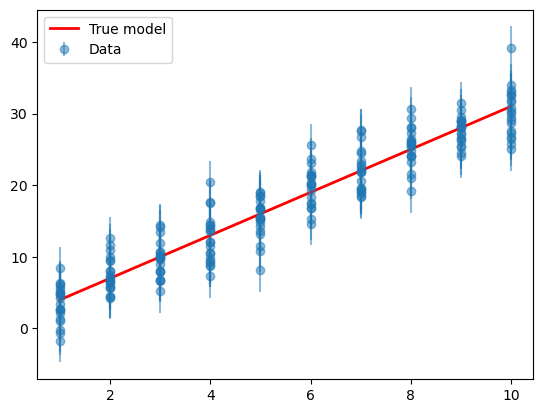

In [6]:
plt.errorbar(x_set.flatten(), y.flatten(), yerr=sigma_0.flatten(), fmt='o', color='C0', alpha=0.5, label='Data')
plt.plot(x, y_true[0, :], 'r-', label='True model', lw=2)

plt.legend(loc='upper left')
plt.show()

In [7]:
sigma_0_adjust = sigma_0.copy()
sigma_0_adjust[:, 3:7] = 10

y_adjust = linear(x_set, m, k) + np.random.normal(mean, sigma_0_adjust, x_set.shape)


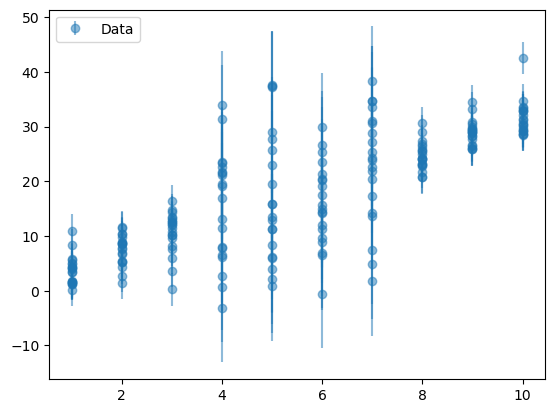

In [8]:
plt.errorbar(x_set.flatten(), y_adjust.flatten(), yerr=sigma_0_adjust.flatten(), fmt='o', color='C0', alpha=0.5, label='Data')



plt.legend(loc='upper left')
plt.show()

In [9]:
mean_y_adjust = np.mean(y_adjust, axis=0)
sigma_y_adjust = np.std(y_adjust, axis=0)
print(f'y_true: {y_true[0, :]}')
print(f"mean: {mean_y_adjust}")
print(f"std: {sigma_y_adjust}")

y_true: [ 4.  7. 10. 13. 16. 19. 22. 25. 28. 31.]
mean: [ 3.7317675   7.51018254 10.62186273 15.3878198  17.27131913 15.90692865
 22.85163387 24.72823459 28.93321474 31.62547308]
std: [ 2.57154411  2.70636339  3.81006406  9.85004994 11.60101412  7.44949283
 10.06736762  2.48776362  2.23224275  3.11042094]


In [10]:
parms, cov = curve_fit(linear, x_set.flatten(), y_adjust.flatten(), sigma=sigma_0_adjust.flatten(), absolute_sigma=True)
parms_uncertainty = np.sqrt(np.diag(cov))

print(f"m: {parms[0]} ± {parms_uncertainty[0]}")
print(f"k: {parms[1]} ± {parms_uncertainty[1]}")


m: 3.036747091742827 ± 0.07597980536937424
k: 1.156118712173278 ± 0.4953643977053076


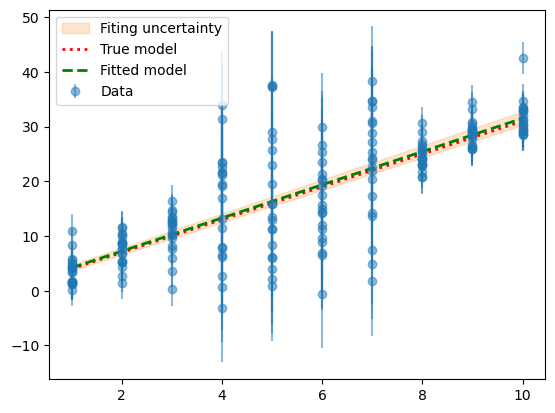

In [11]:
# Calculate the upper and lower bounds of the model
y_upper = linear(x, parms[0] + parms_uncertainty[0], parms[1] + parms_uncertainty[1])
y_lower = linear(x, parms[0] - parms_uncertainty[0], parms[1] - parms_uncertainty[1])

# Plot the area of uncertainties
plt.fill_between(x, y_lower, y_upper, color='C1', alpha=0.2, label='Fiting uncertainty')

plt.errorbar(x_set.flatten(), y_adjust.flatten(), yerr=sigma_0_adjust.flatten(), fmt='o', color='C0', alpha=0.5, label='Data')

plt.plot(x, y_true[0, :], 'r:', label='True model', lw=2)

# Plot the fitted model
plt.plot(x, linear(x, *parms), 'g--', label='Fitted model', lw=2)

# Add legend and show the plot
plt.legend(loc='upper left')
plt.show()